In [42]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

bankChurners = pd.read_csv("./assets/BankChurners.csv")
bankChurners.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [43]:
bankChurners.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

### Preprocess data 

In [44]:
#bankChurners = bankChurners.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
   #             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)



# Drop last two columns
bankChurners = bankChurners.drop(bankChurners.columns[-2:], axis=1)

# Drop CLIENTNUM column
#bankChurners = bankChurners.drop('CLIENTNUM', axis=1)

print(bankChurners.isnull().sum())
print (bankChurners.describe())

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    

In [45]:
attrition_counts = bankChurners['Attrition_Flag'].value_counts()

# Printing the count of each category
print(attrition_counts)

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


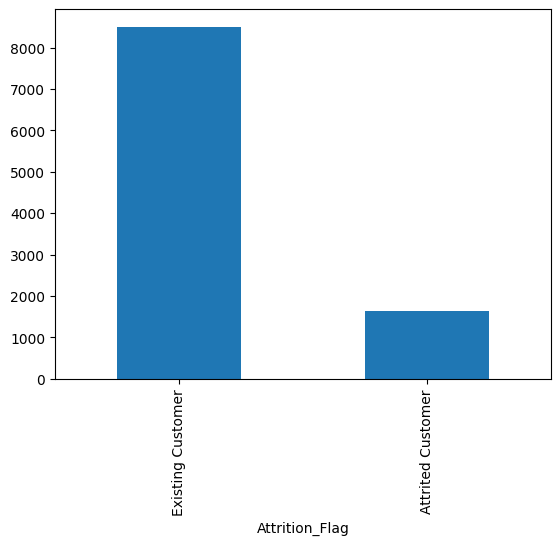

In [46]:
bankChurners.Attrition_Flag.value_counts()
print(bankChurners.Attrition_Flag.value_counts().plot(kind='bar'))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18276\3878939948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bankChurners, x='Income_Category', order=bankChurners['Income_Category'].value_counts().index, palette='coolwarm')


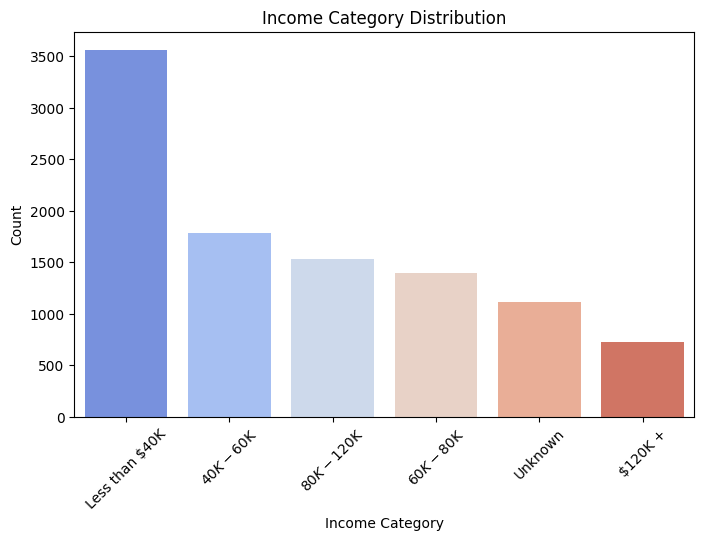

In [47]:
# Income Category distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=bankChurners, x='Income_Category', order=bankChurners['Income_Category'].value_counts().index, palette='coolwarm')
plt.title("Income Category Distribution")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [48]:
from sklearn.impute import SimpleImputer

categorical_columns = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Gender']

bankChurners['Gender'].value_counts()
bankChurners['Education_Level'].value_counts() #Unknown 1519
bankChurners['Marital_Status'].value_counts() #749
bankChurners['Card_Category'].value_counts()

#bankChurners_cleaned = bankChurners[~bankChurners['Education_Level'].isin(['Unknown'])] #10127 --> 8608
#bankChurners_cleaned = bankChurners_cleaned[~bankChurners_cleaned['Marital_Status'].isin(['Unknown'])] #8608 --> 7973
#bankChurners_cleaned


# Replace 'Unknown' with NaN for consistent missing value handling
bankChurners = bankChurners.replace('Unknown', np.nan)

# Setup SimpleImputer to fill NaN values with the mode
mode_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the specified columns
bankChurners['Education_Level'] = mode_imputer.fit_transform(
    bankChurners[['Education_Level']])[:, 0]
bankChurners['Income_Category'] = mode_imputer.fit_transform(
    bankChurners[['Income_Category']])[:, 0]
bankChurners['Marital_Status'] = mode_imputer.fit_transform(
    bankChurners[['Marital_Status']])[:, 0]

bankChurners

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Married  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123        Graduate       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Married     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124  

<Figure size 2500x2500 with 0 Axes>

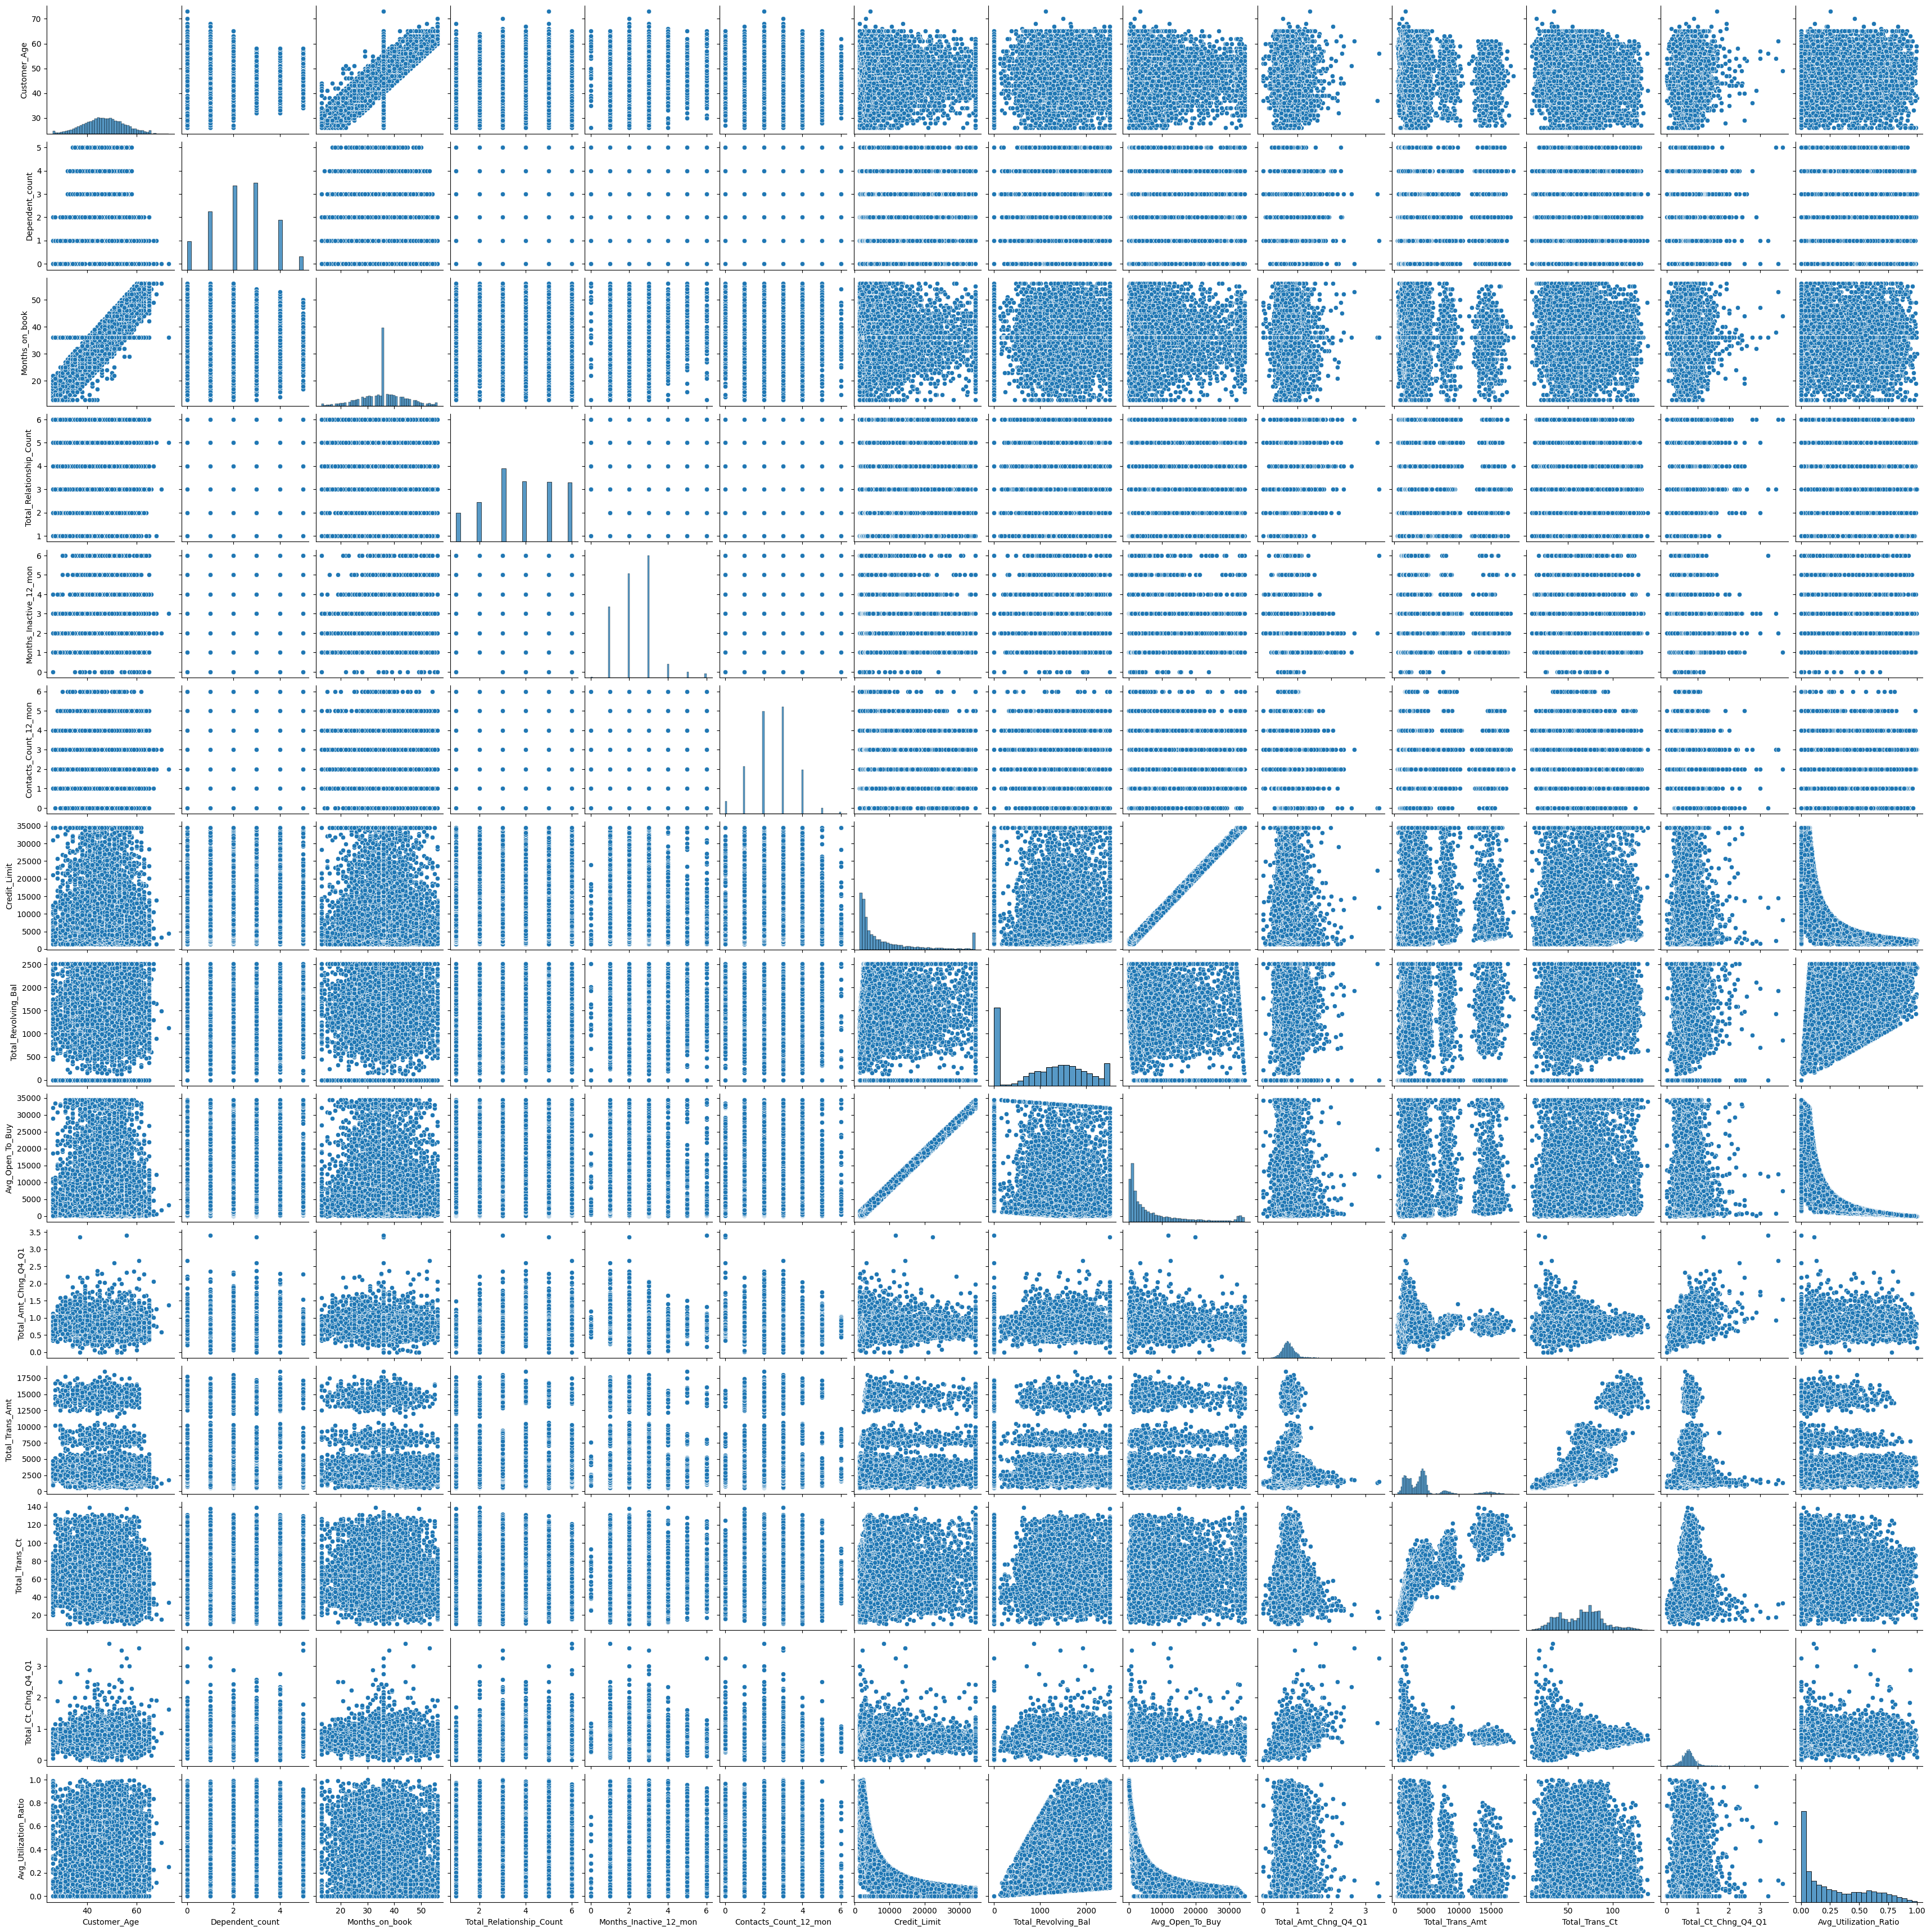

In [49]:
numeric_df = bankChurners.select_dtypes(include=['number'])
numeric_df = numeric_df.iloc[:, 1:] #Exclude CLIENTNUM



plt.figure(figsize=(25, 25))
sns.pairplot(numeric_df)
plt.show()

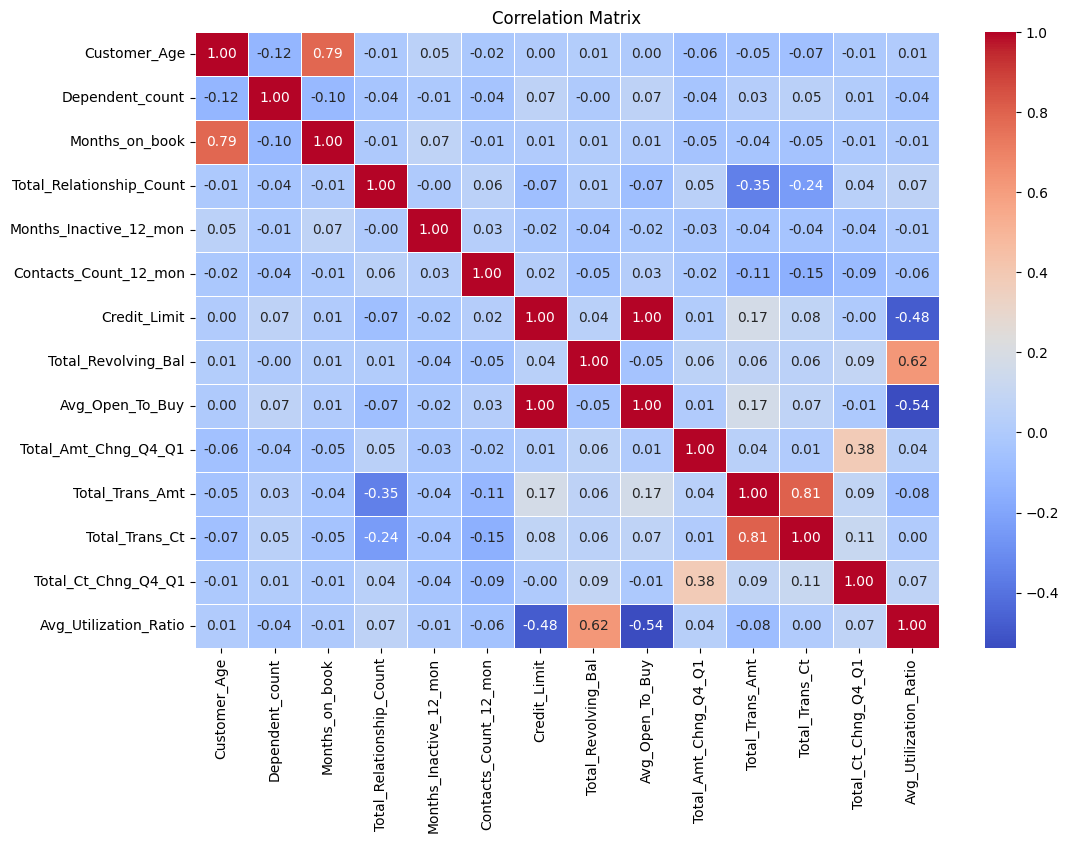

In [50]:
corelation= numeric_df.corr()
round(corelation,2)

plt.figure(figsize=(12, 8))
sns.heatmap(corelation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [51]:


# Convert categorical columns to numerical
bankChurners['Gender'] = bankChurners['Gender'].map({'M': 0, 'F': 1})

# Use one-hot encoding for the other categorical columns
categorical_columns = ['Education_Level', 'Marital_Status', 'Income_Category','Card_Category']
bankChurners = pd.get_dummies(bankChurners, columns=categorical_columns)

# Encode the target variable
label_encoder = LabelEncoder()
bankChurners['Attrition_Flag'] = label_encoder.fit_transform(bankChurners['Attrition_Flag'])

#Separate features and target and Train
X = bankChurners.drop('Attrition_Flag', axis=1)
y = bankChurners['Attrition_Flag']


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Select top 5 features
top_features = feature_importance_df['feature'].head(5).values
print("Top 5 features:", top_features)
bankChurners

Top 5 features: ['Total_Trans_Amt' 'Total_Trans_Ct' 'Total_Revolving_Bal'
 'Total_Ct_Chng_Q4_Q1' 'Avg_Utilization_Ratio']


CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0      768805383               1            45       0                3   
1      818770008               1            49       1                5   
2      713982108               1            51       0                3   
3      769911858               1            40       1                4   
4      709106358               1            40       0                3   
...          ...             ...           ...     ...              ...   
10122  772366833               1            50       0                2   
10123  710638233               0            41       0                2   
10124  716506083               0            44       1                1   
10125  717406983               0            30       0                2   
10126  714337233               0            43       1                2   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  ...  Marital_Status_Single  \
0                          3       12691.0  ...                  False   
1                          2        8256.0  ...                   True   
2                          0        3418.0  ...                  False   
3                          1        3313.0  ...                  False   
4                          0        4716.0  ...                  False   
...                      ...           ...  ...                    ...   
10122                      3        4003.0  ...                   True   
10123                      3        4277.0  ...                  False   
10124                      4        5409.0  ...                  False   
10125                      3        5281.0  ...                  False   
10126                      4       10388.0  ...                  False   

       Income_Category_$120K +  Income_Category_$40K - $60K  \
0                        False                        False   
1                        False                        False   
2                        False                        False   
3                        False                        False   
4                        False                        False   
...                        ...                          ...   
10122                    False                         True   
10123                    False                         True   
10124                    False                        False   
10125                    False                         True   
10126                    False                        False   

       Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                             True                         False   
1                            False                         False   
2                            False                          True   
3                            False                         False   
4                             True                         False   
...                            ...                           ...   
10122                        False                         False   
10123          

In [52]:
df_top_features = bankChurners[top_features]
df_top_features.head()

Total_Trans_Amt  Total_Trans_Ct  Total_Revolving_Bal  Total_Ct_Chng_Q4_Q1  \
0             1144              42                  777                1.625   
1             1291              33                  864                3.714   
2             1887              20                    0                2.333   
3             1171              20                 2517                2.333   
4              816              28                    0                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

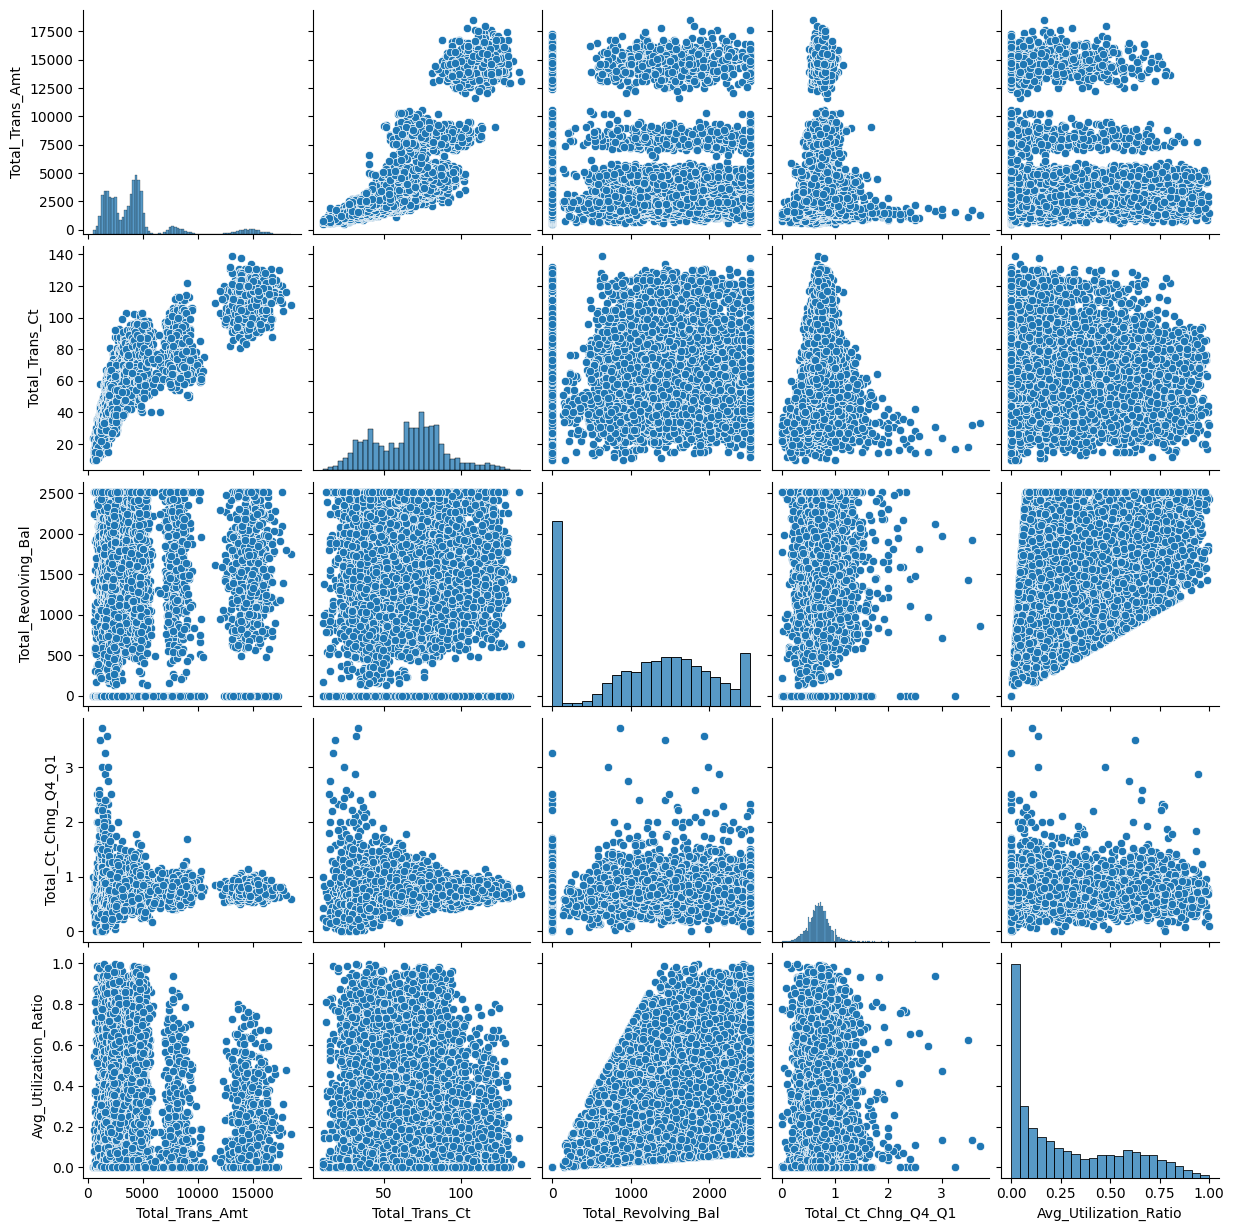

In [53]:
# Create the pairplot
sns.pairplot(df_top_features)
plt.show()

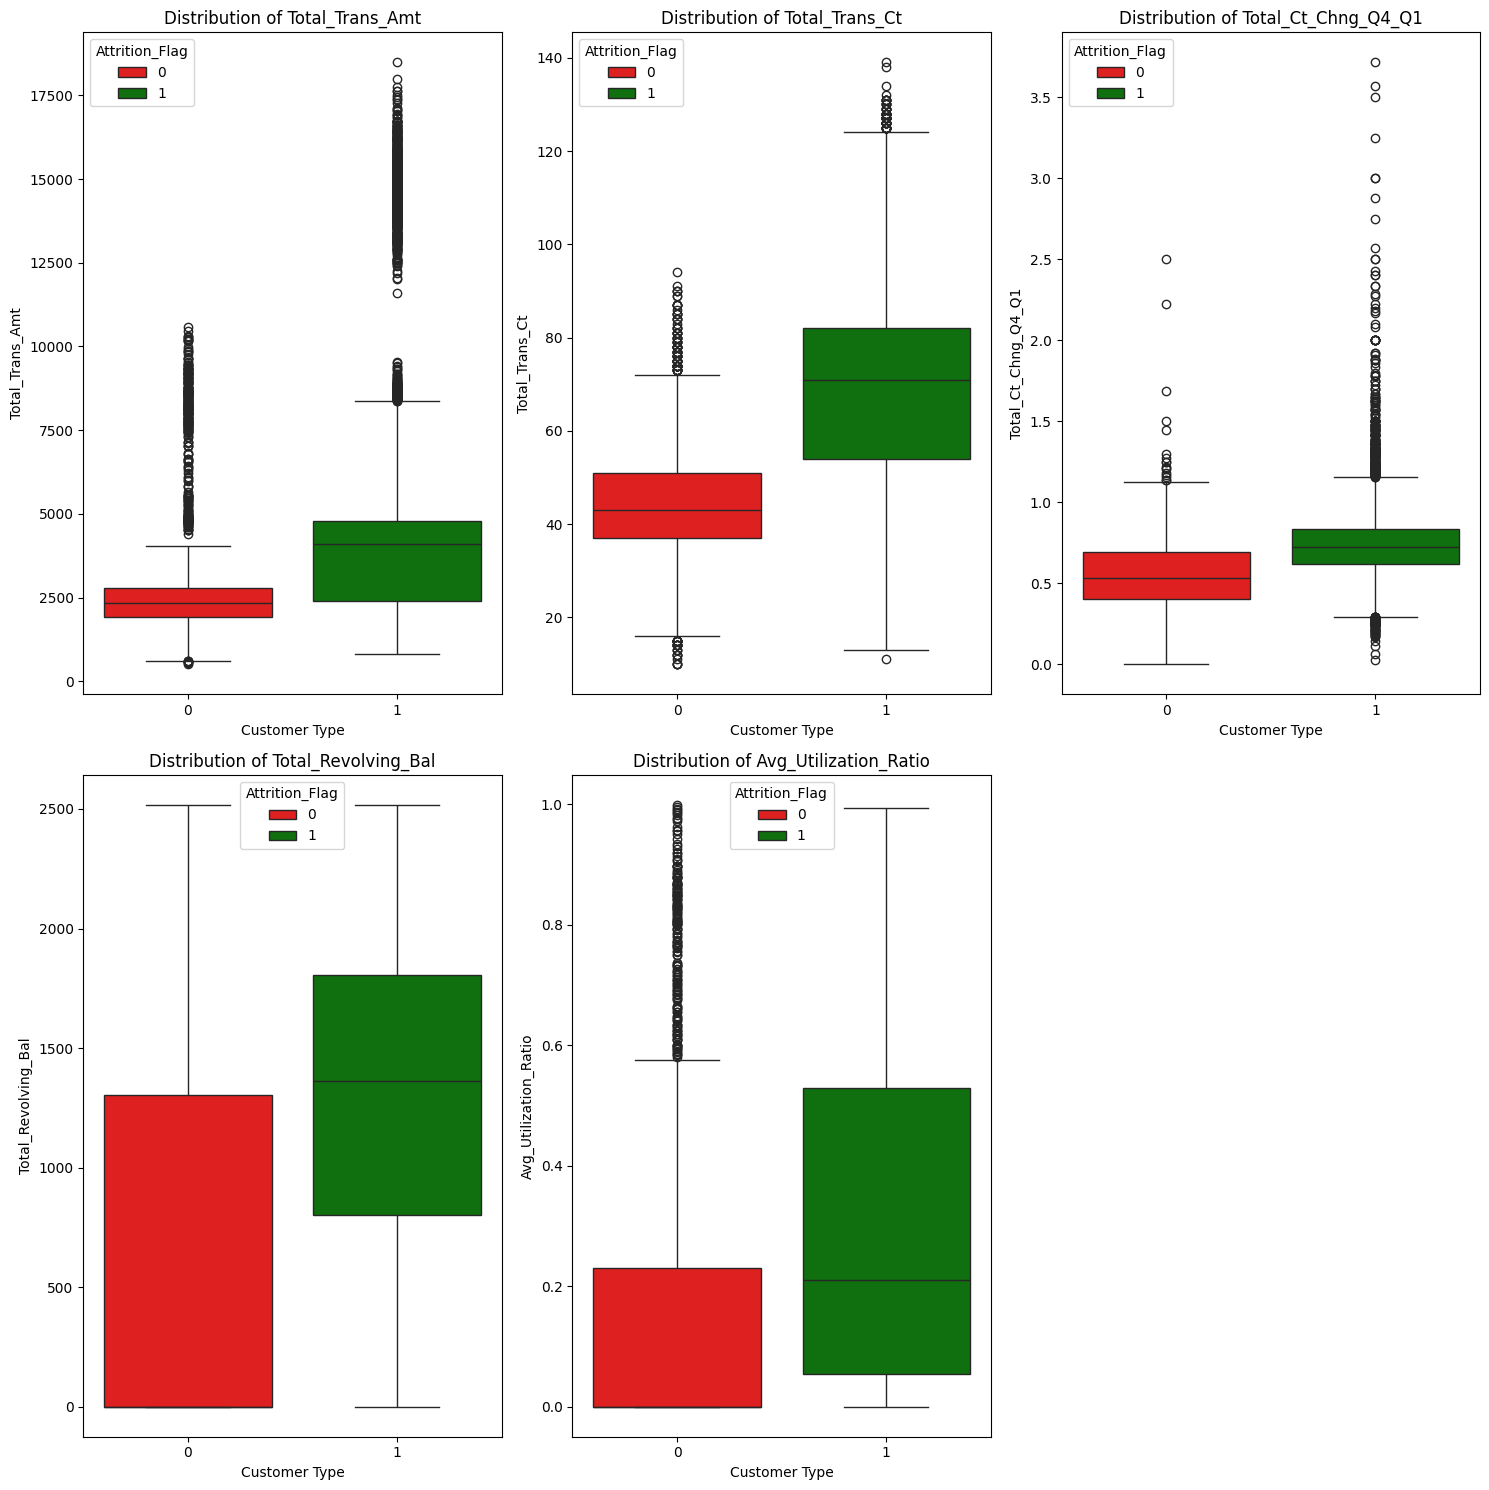

In [54]:
top_important_features  = ['Total_Trans_Amt',
                   'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio']

plt.figure(figsize=(15, 15))
top_important_features
# Create a box plot for each column
for i, column in enumerate(top_important_features, 1):
    plt.subplot(2, 3, i)  # Adjust the layout based on the number of columns)

    # create a single dataset suitable for plotting
    subset_data = bankChurners[[column, 'Attrition_Flag']]

    # Define the palette for the groups
    #palette_colors = {"Attrited Customer": "red", "Existing Customer": "green"}
    palette_colors = {0: "red", 1: "green"}
    # Create the box plot with seaborn
    sns.boxplot(x='Attrition_Flag', y=column, hue='Attrition_Flag',
                data=subset_data, palette=palette_colors, dodge=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Customer Type')
    plt.ylabel(column)
   
plt.tight_layout()
plt.show()

Optimal number of clusters: 3


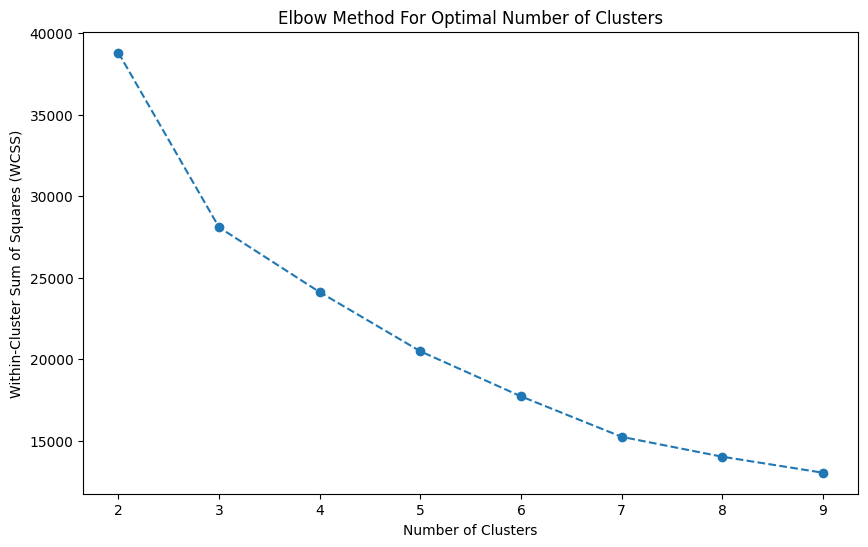

In [55]:
# Standardize the features
scaler = StandardScaler()
df_top_features_scaled = scaler.fit_transform(df_top_features)

# Define the range of clusters to try
cluster_range = range(2, 10)
wcss = []

# Determine the optimal number of clusters using the Silhouette Method
silhouette_scores = {}

# Calculate WCSS for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_top_features_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores[k] = silhouette_score(df_top_features_scaled, kmeans.labels_)


optimal_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Optimal number of clusters: {optimal_k}")

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [56]:
# Fit K-Means with optimal clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
bankChurners['Cluster'] = kmeans.fit_predict(df_top_features_scaled)

#kmeans.fit(df_top_features_scaled)
#pred_km = kmeans.labels_

data_km = pd.concat([df_top_features, bankChurners['Cluster']], axis=1)
data_km.head()

Total_Trans_Amt  Total_Trans_Ct  Total_Revolving_Bal  Total_Ct_Chng_Q4_Q1  \
0             1144              42                  777                1.625   
1             1291              33                  864                3.714   
2             1887              20                    0                2.333   
3             1171              20                 2517                2.333   
4              816              28                    0                2.500   

   Avg_Utilization_Ratio  Cluster  
0                  0.061        2  
1                  0.105        0  
2                  0.000        2  
3                  0.760        0  
4                  0.000        2

In [57]:
# Analyze clusters
cluster_summary = bankChurners.groupby('Cluster')[['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio']].mean()
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
         Customer_Age  Credit_Limit  Total_Revolving_Bal  \
Cluster                                                    
0           46.465865   5796.742551          1717.006521   
1           45.521973  15063.675336          1442.373991   
2           46.377101  10274.100219           424.414129   

         Avg_Utilization_Ratio  
Cluster                         
0                     0.484896  
1                     0.172213  
2                     0.051752  


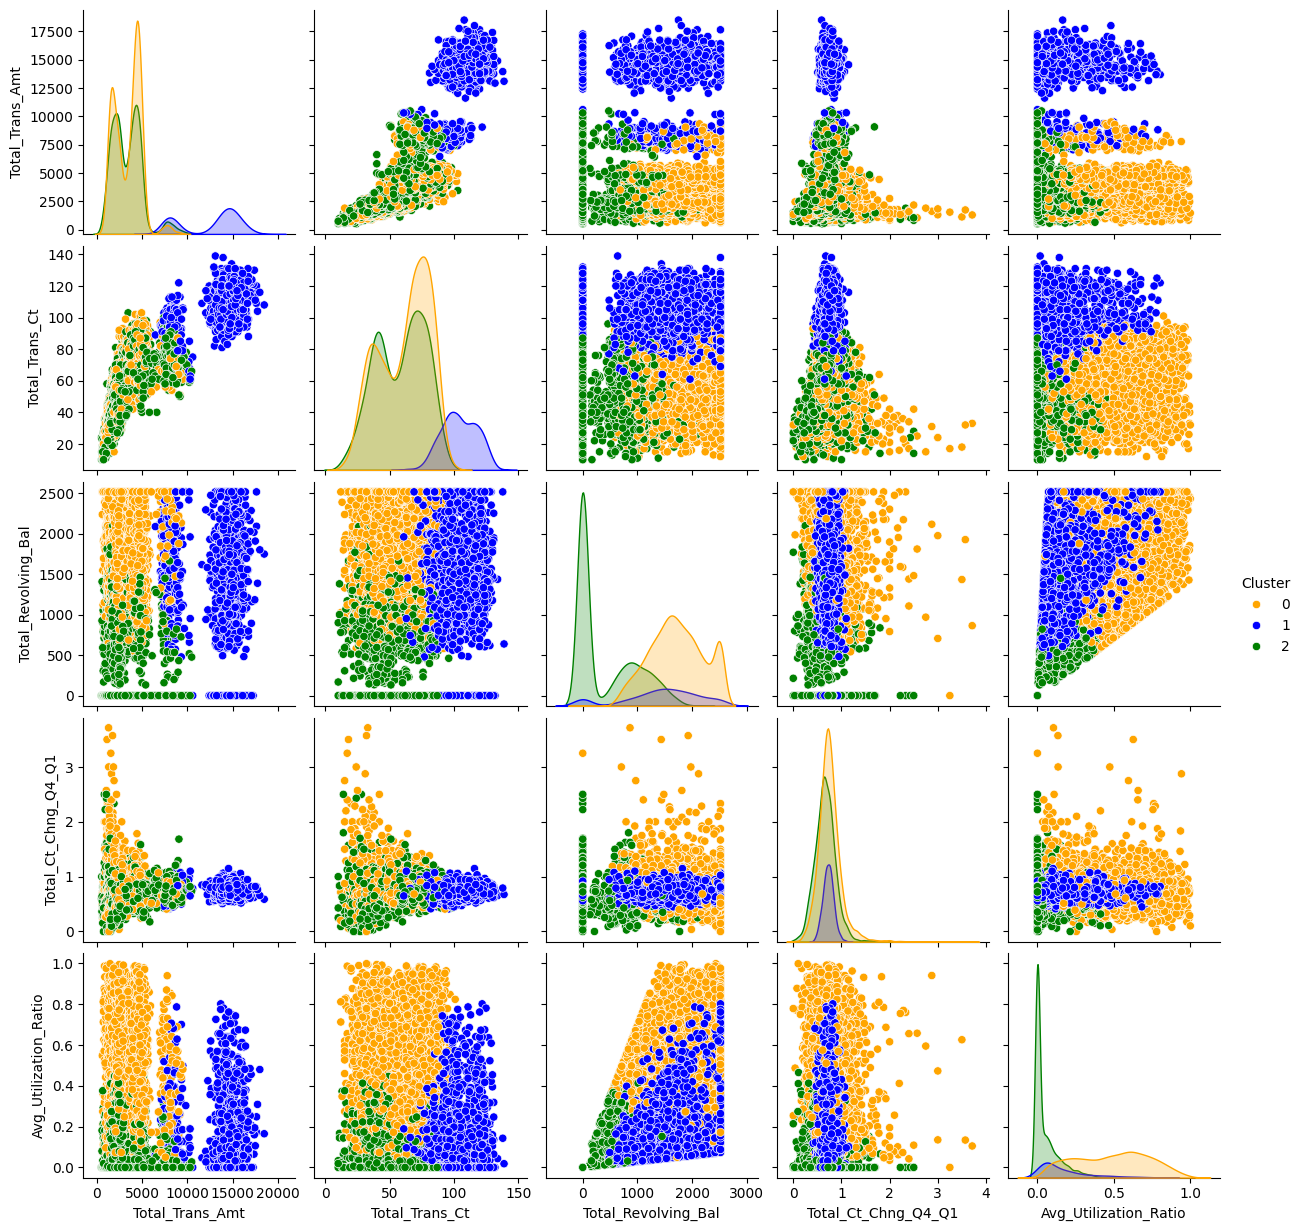

In [58]:
sns.pairplot(data_km, hue='Cluster', palette = ["orange","blue","green"])
